# Example 1: Fitting to Give n Ploynomial Of degree 1 (Linear Regression)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

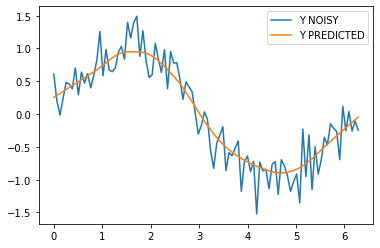

In [8]:
from math import ceil
import numpy as np
from scipy import linalg  
 
 
def lowess(x, y, f= 2. / 3., iter=3):
    
    n = len(x) # Number of x  points 
    r = int(ceil(f * n))  # Computing the residual of smoothing functions 
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)] # 
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)  # Weight Function 
    w = (1 - w ** 3) ** 3  # Tricube Weight Function
    ypred = np.zeros(n) # Initialisation of predictor 
    delta = np.ones(n)  # Initialisation of delta
   
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i] # Cumulative Weights 
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)]) # Matrix B
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]]) # Matrix A
                      
            beta = linalg.solve(A, b) # Beta,Solution of AX= B equation 
            ypred[i] = beta[0] + beta[1] * x[i]
             
        residuals = y - ypred   # Finding Residuals
        s = np.median(np.abs(residuals))  # Median of Residuals
        delta = np.clip(residuals / (6.0 * s), -1, 1)  # Delta
        delta = (1 - delta ** 2) ** 2   # Delta 
 
    return ypred

if __name__ == '__main__':  # Main Function
    
    import math
    
    n = 100  # Number of data points
   
    #Case1: Sinusoidal Fitting 
    x = np.linspace(0, 2 * math.pi, n)
    print(x)
    y = np.sin(x) + 0.3 * np.random.randn(n) 
    
    #Case2 : Straight Line Fitting
    #x=np.linspace(0,2.5,n) # For Linear
    #y= 1 + 0.25*np.random.randn(n) # For Linear
    
    f = 0.25
    ypred = lowess(x, y, f=f, iter=3)
    
    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='Y NOISY')
    pl.plot(x, ypred, label='Y PREDICTED')
    pl.legend()
    pl.show()
